<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_04_04_%EB%B3%80%EC%88%98%EC%84%A0%ED%83%9D%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 변수선택법 실습

### 1.라이브러리 import

In [ ]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

### 2. 붓꽃 데이터 로드

In [ ]:
# iris 붓꽃 데이터 로드

from sklearn.datasets import load_iris

iris = load_iris()


In [ ]:
# 붓꽃 데이터 특성 확인

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 3. 데이터프레임 변환

In [ ]:
# 데이터 생성 및 준비

df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target,dtype = "category")
sy = sy.cat.rename_categories(iris.target_names)
df["species"] = sy

# 필터명 정의

cols = iris.feature_names

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 4. 필터 기법 이용한 변수선택

#### 4-1 분산을 이용한 필터기법
- VarianceThreshold: 분산이 기준치보다 낮은 특징 데이터는 사용하지 않는 기법

In [ ]:
# sklearn의 VarianceThreshold 사용

from sklearn.feature_selection import VarianceThreshold

In [ ]:
# 분산 스레드 홀더 설정
selector = VarianceThreshold()

# VarianceThreshold 설정 없이 분산 산출
selector.fit(df[cols])

print(selector.variances_)

[0.68112222 0.18871289 3.09550267 0.57713289]


In [ ]:
# threshold 설정
selector.set_params(threshold = 0.6)

# refit and transform
v_sel = selector.fit_transform(df[cols])

# 분산 확인
print(selector.variances_)

# 분산이 임계치보다 작은 피처 확인
print(selector.get_support())

[0.68112222 0.18871289 3.09550267 0.57713289]
[ True False  True False]


In [ ]:
# 특성 필터하여 데이터프레임에 저장
iris_sel_df = df.iloc[:,[0,2]]
iris_sel_df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [ ]:
# 결과 데이터프레임 생성
iris_sel_df = pd.concat([iris_sel_df,df[["species"]]],axis = 1)
iris_sel_df.head()

,sepal length (cm),petal length (cm),species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


#### 4-2 큰 상관계수 이용한 필터

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# 상관계수 생성
cor = df.corr()
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


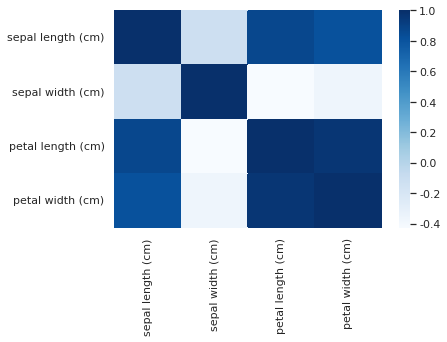

In [ ]:
# 히트맵 시각화

sns.heatmap(cor, annot = False, cmap = plt.cm.Blues)
plt.show()

In [ ]:
# sepal length 속성의 상관계수 정의

cor_target = abs(cor["sepal length (cm)"])
print(cor_target)

sepal length (cm)    1.000000
sepal width (cm)     0.117570
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [ ]:
# 상관관계가 0.6보다 큰 속성 확인

cor_target[cor_target>0.6]

sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64

In [ ]:
selected_cols = cor_target[cor_target>0.6]
print("상관계수 > 0.6인 속성 ","\n",
      selected_cols)

상관계수 > 0.6인 속성  
 sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64
